# Multicollinearity of Features - Lab

## Introduction

In this lab, you'll identify multicollinearity in the Ames Housing dataset.

## Objectives

You will be able to:

* Create a scatter matrix and correlation matrix
* Assess and interpret the output of a correlation matrix
* Identify if variables are exhibiting collinearity
* Decide how to address the collinearity in the data set

## Correlation matrix for the Ames Housing data

### Import data

Let's reimport the Ames Housing data assign the numeric variables we want to keep to `numeric_vars`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

ames = pd.read_csv('ames.csv')

numeric_vars = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea',
                'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                'ScreenPorch', 'PoolArea']

### Create processed
Create a new dataframe named `ames_preprocessed` that contains only the features in `numeric_vars`.

In [2]:
# create single dataframe called ames_preprocessed
ames_preprocessed = ames[numeric_vars].copy()
# replace missing values with the mean of each column
ames_preprocessed.fillna(ames_preprocessed.mean(), inplace=True)
# convert to numpy array
ames_preprocessed = ames_preprocessed.to_numpy()


## Scatter matrix
Create the scatter matrix for the Ames Housing data. This takes a few minutes to load!

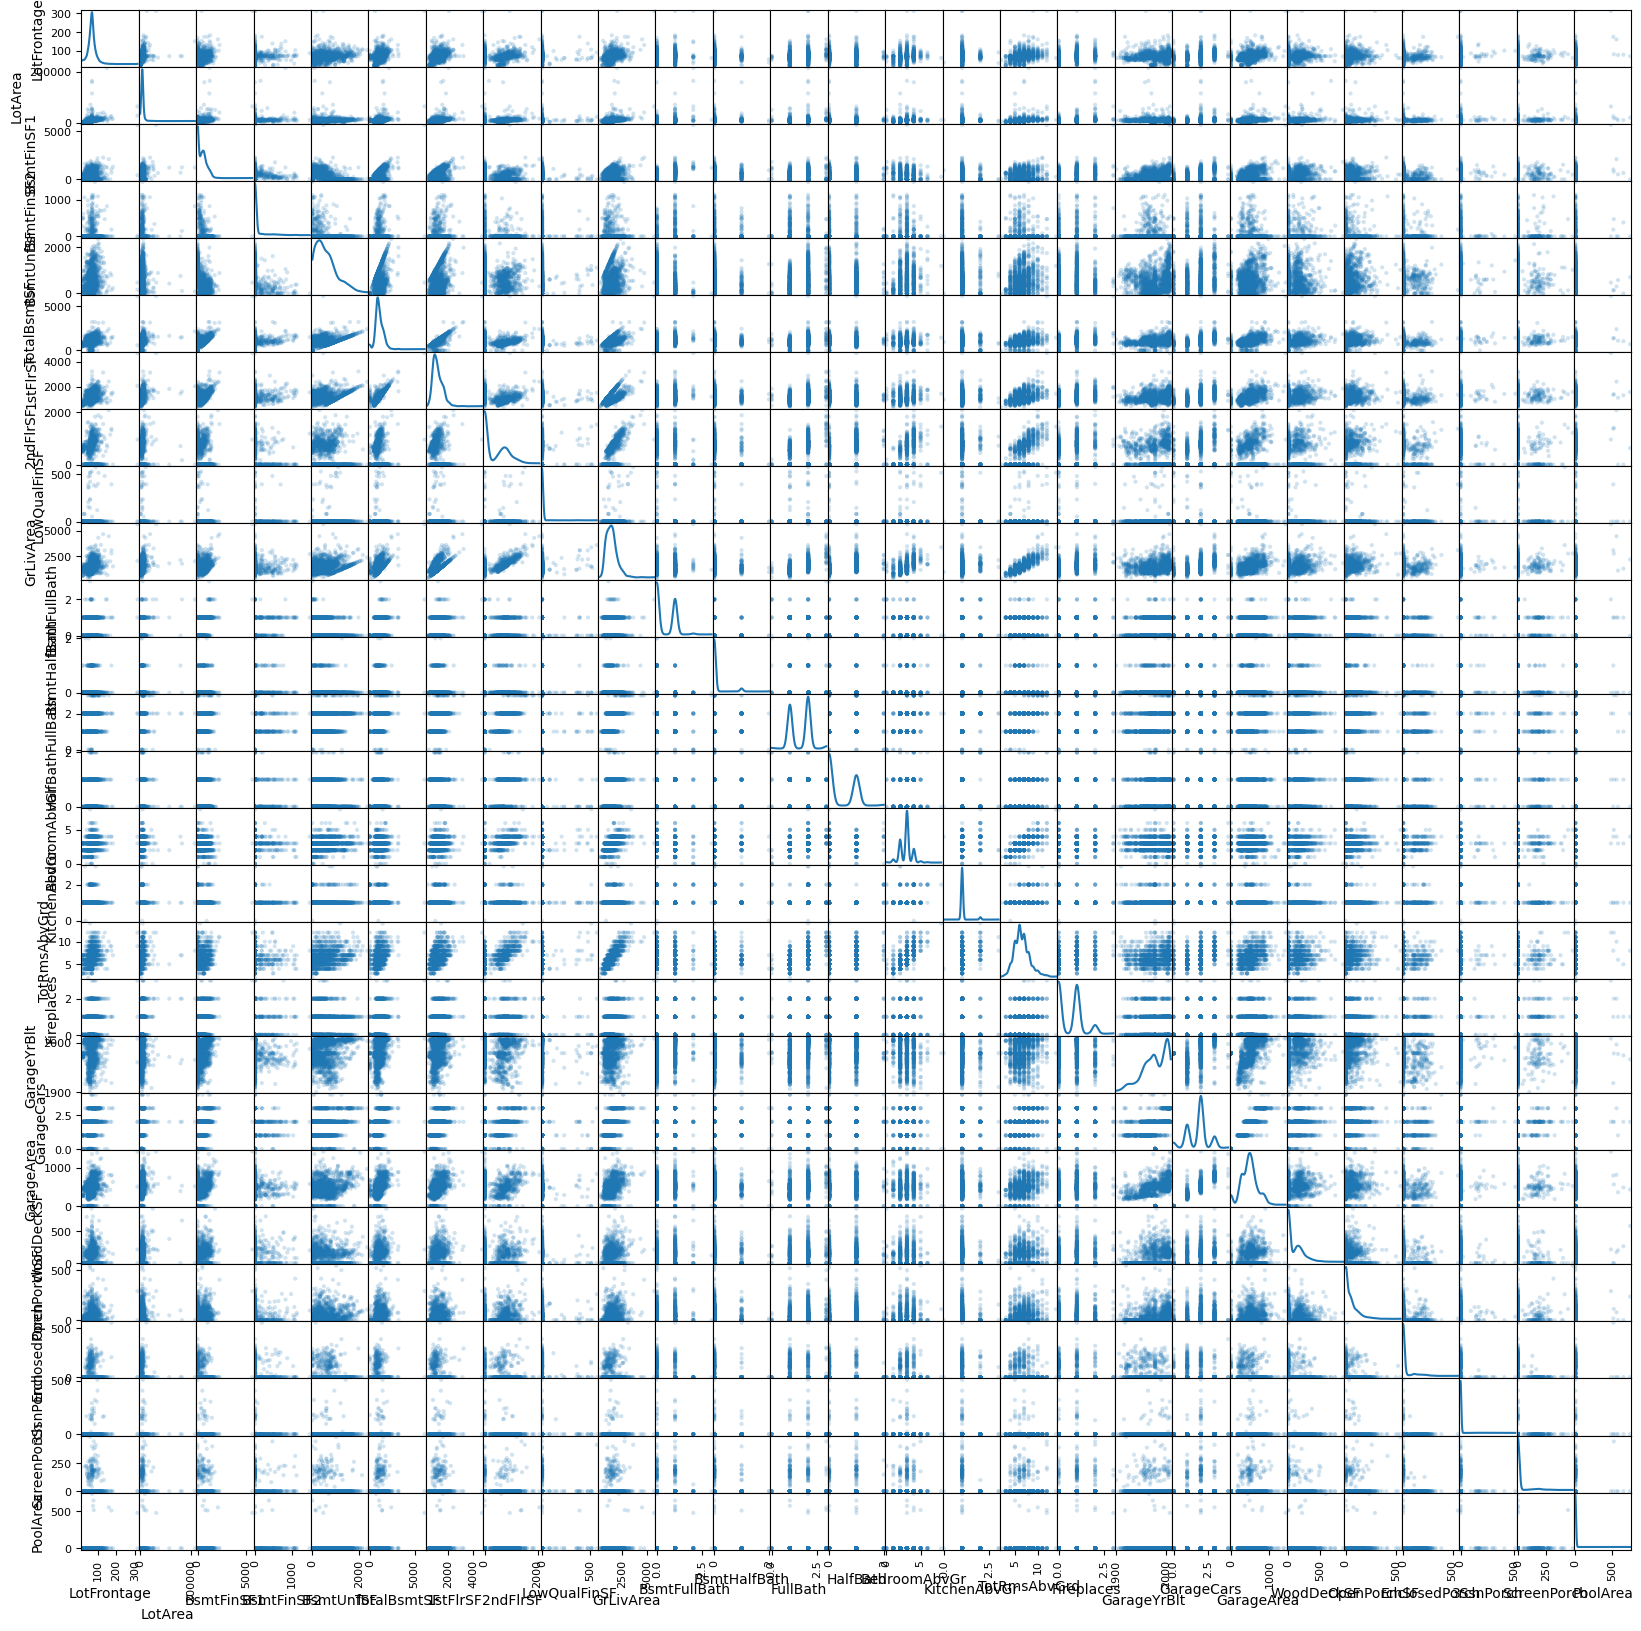

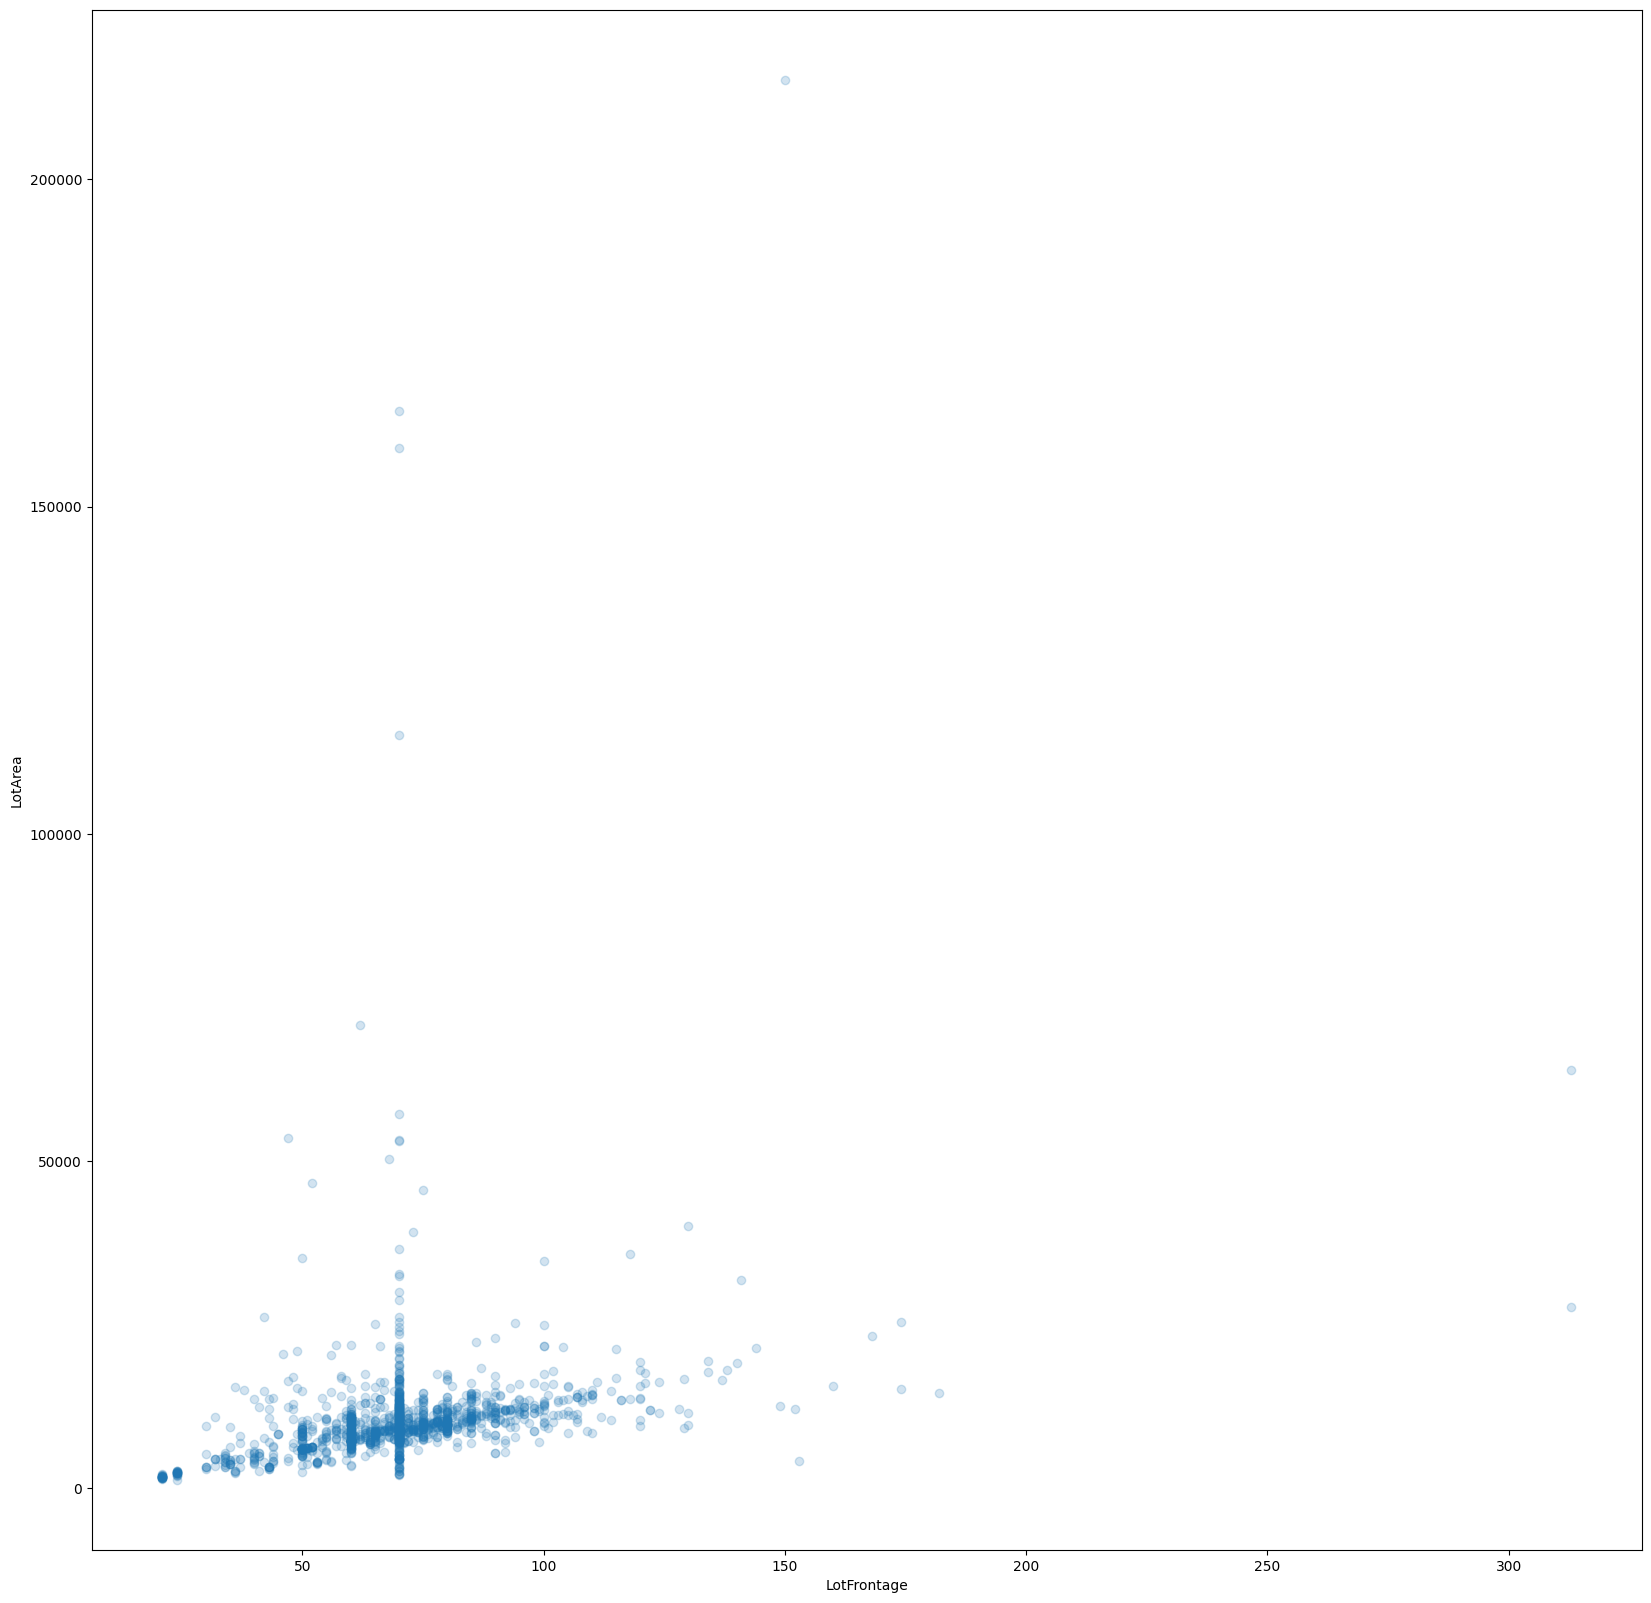

In [4]:
# Convert ames_preprocessed back to DataFrame for plotting
ames_preprocessed_df = pd.DataFrame(ames_preprocessed, columns=numeric_vars)

# use pd.plotting.scatter_matrix
pd.plotting.scatter_matrix(ames_preprocessed_df, figsize=(20, 20), alpha=0.2, diagonal='kde')
# use plt.subplots to create a figure and axes
fig, ax = plt.subplots(figsize=(20, 20))
# use ax.scatter to create a scatter plot
ax.scatter(ames_preprocessed[:, 0], ames_preprocessed[:, 1], alpha=0.2)
# set the x and y labels
ax.set_xlabel('LotFrontage')
ax.set_ylabel('LotArea')
# use plt.show to display the plot
plt.show()


The scatter matrix took a while to load and is hard to read. Run the code below to see if adjusting some of the visualization settings helps. 

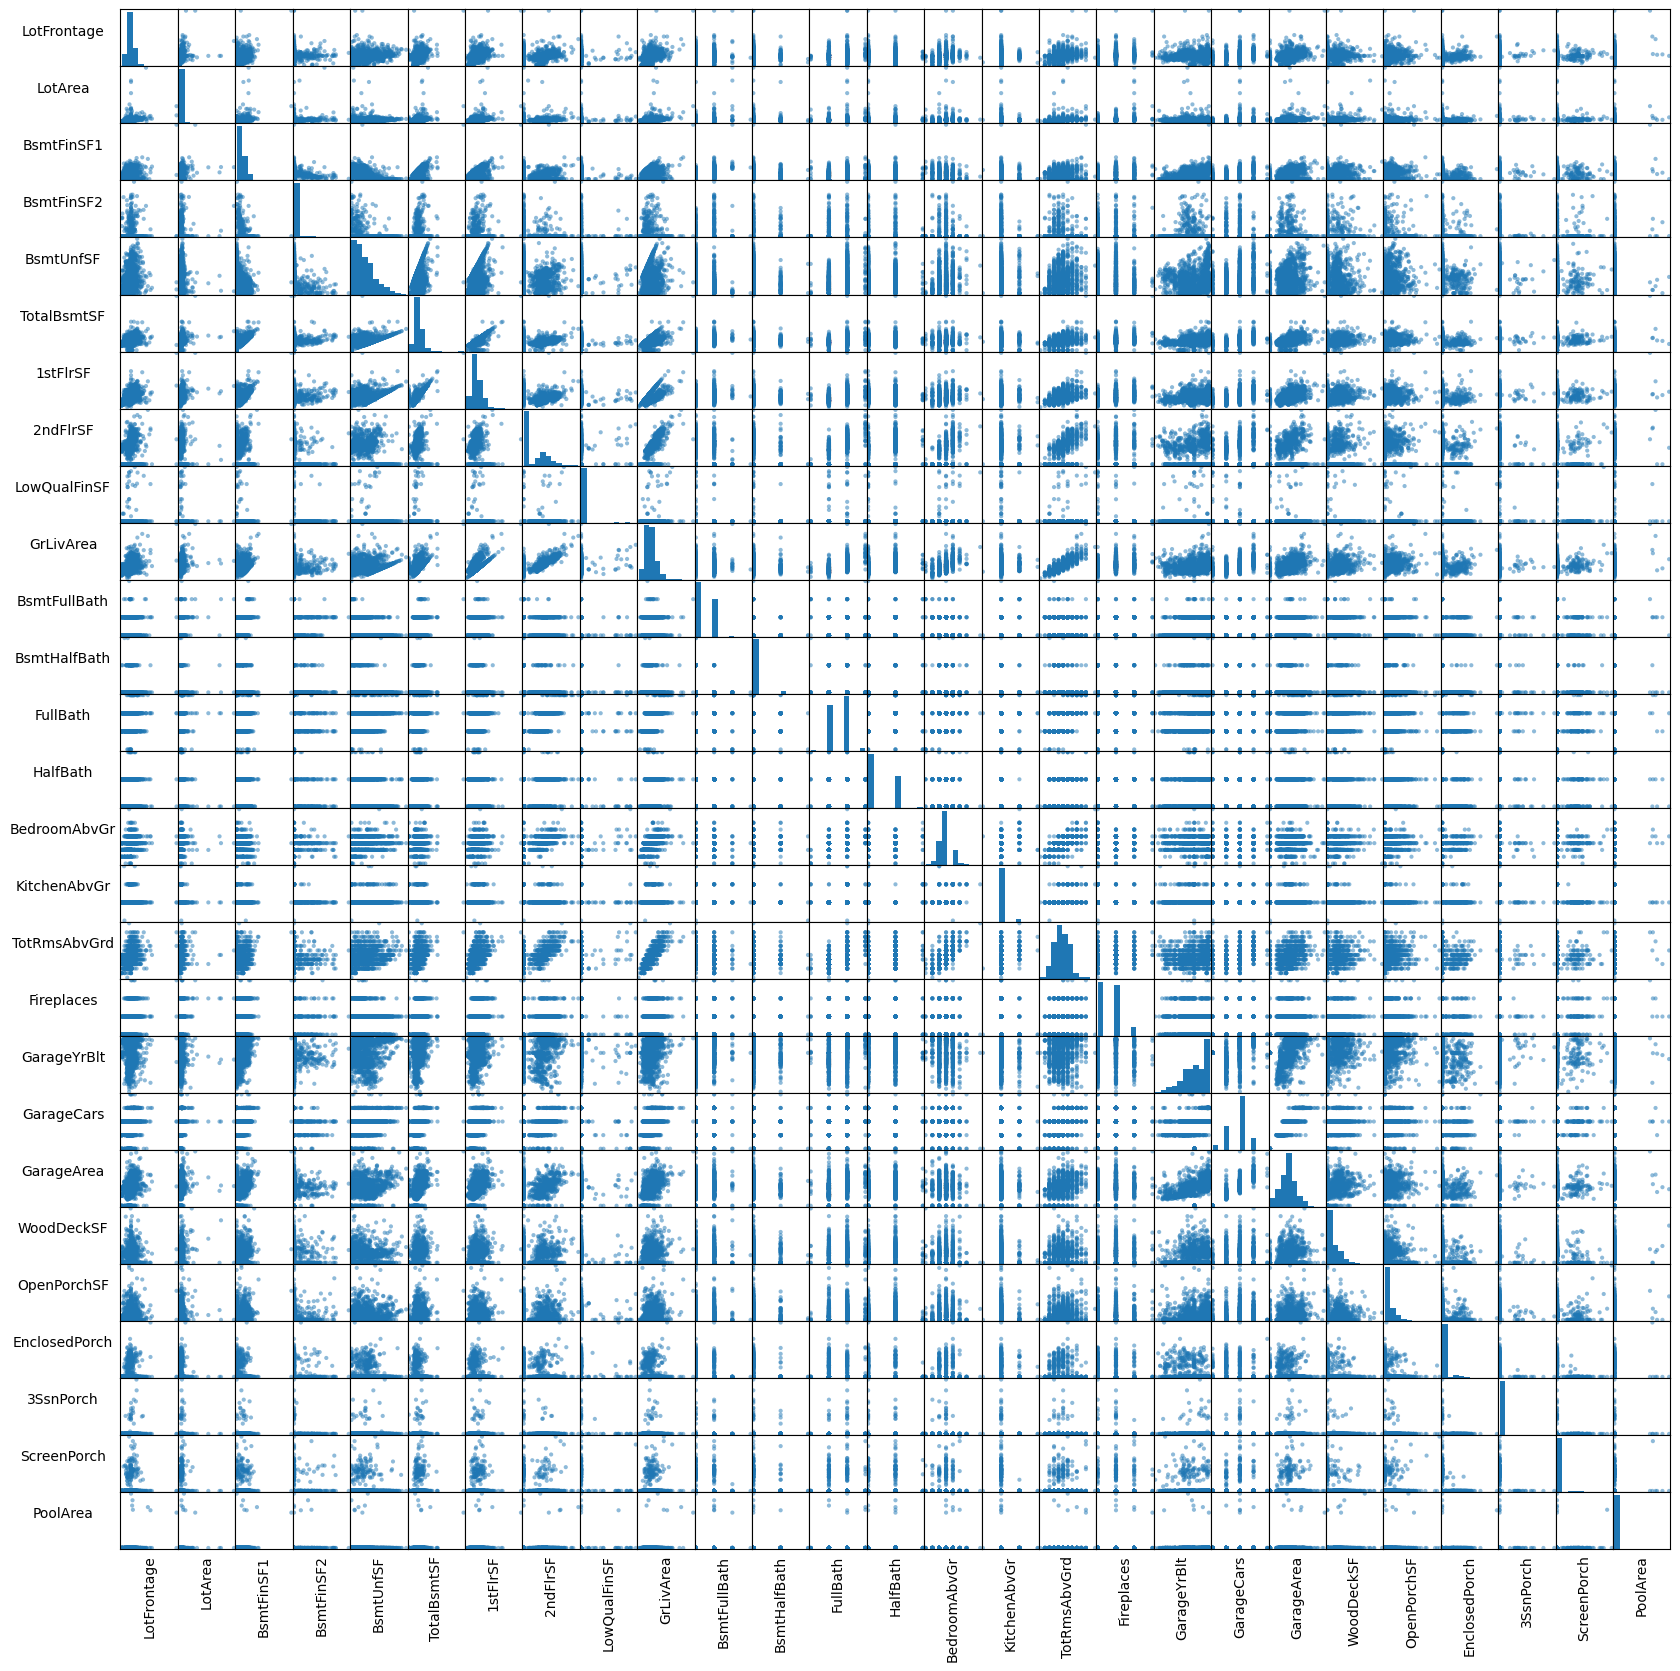

In [6]:
sm = pd.plotting.scatter_matrix(ames_preprocessed_df, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

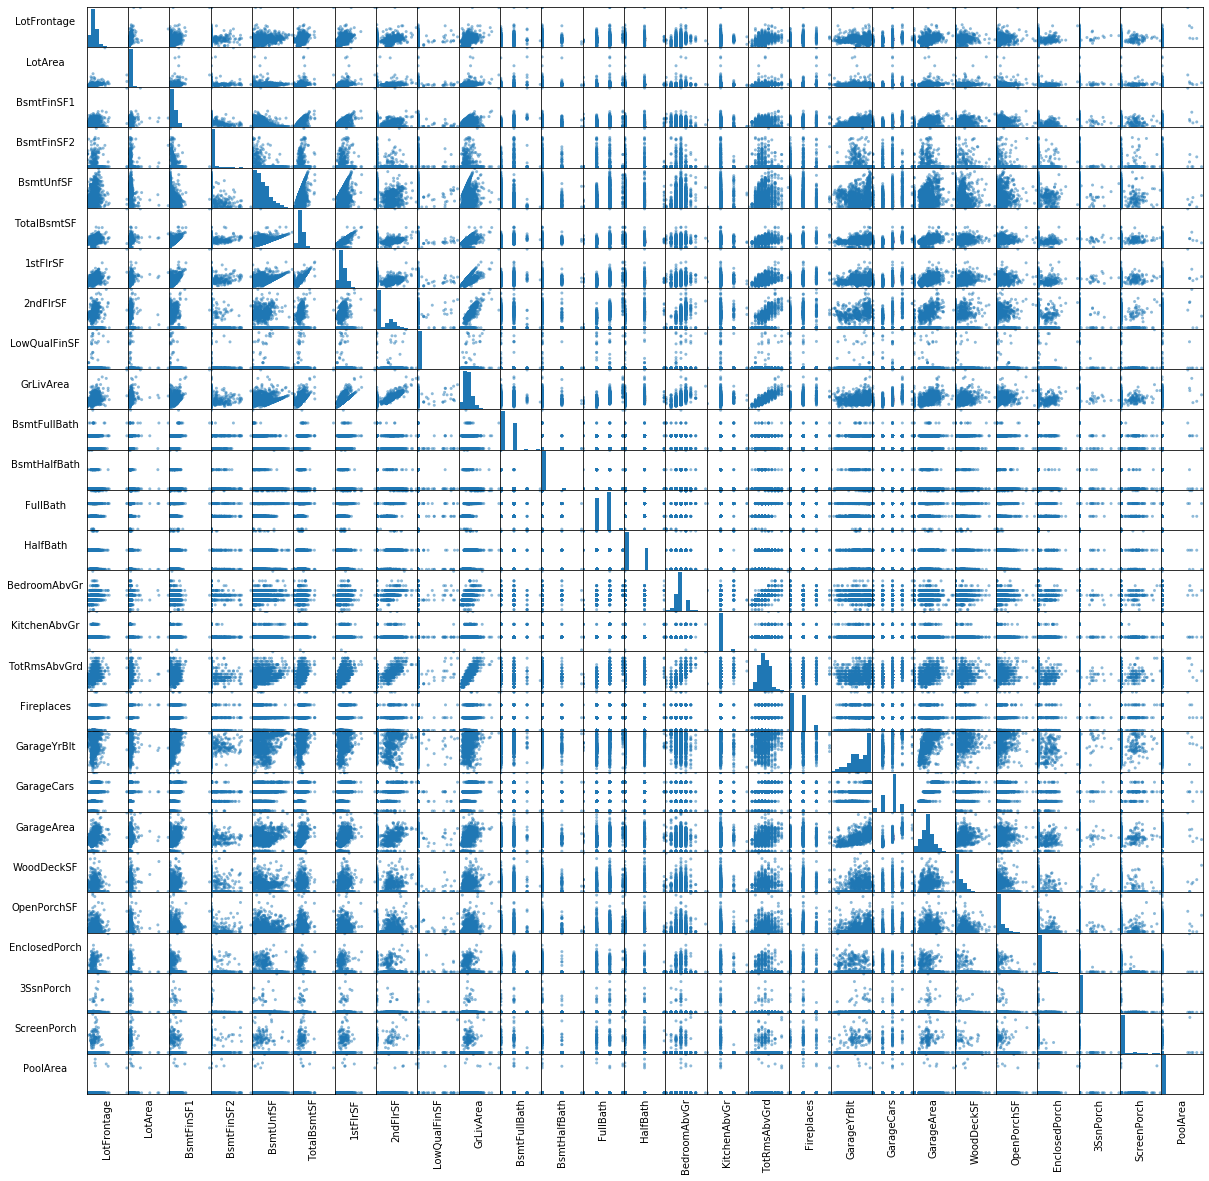

In [4]:
#__Solution__
sm = pd.plotting.scatter_matrix(ames_preprocessed, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

The enhanced plot demonstrates that with larger datasets, scatter matricies become less useful. Through careful examination of the matrix it's clear that `TotRmsAbvGrd` seems correlated with `GrLivArea`, but how easy to use would this matrix if a dataset has hundreds or thousands of variables? Also visual approach to finding correlation cannot be automated, so a numeric approach is a good next step.

## Correlation matrix

Next, create and look at the correlation matrix: 

In [7]:
#Create and look at the correlation matrix
corr_matrix = ames_preprocessed_df.corr()
print(corr_matrix)



               LotFrontage   LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
LotFrontage       1.000000  0.306795    0.215828    0.043340   0.122156   
LotArea           0.306795  1.000000    0.214103    0.111170  -0.002618   
BsmtFinSF1        0.215828  0.214103    1.000000   -0.050117  -0.495251   
BsmtFinSF2        0.043340  0.111170   -0.050117    1.000000  -0.209294   
BsmtUnfSF         0.122156 -0.002618   -0.495251   -0.209294   1.000000   
TotalBsmtSF       0.363358  0.260833    0.522396    0.104810   0.415360   
1stFlrSF          0.414266  0.299475    0.445863    0.097117   0.317987   
2ndFlrSF          0.072483  0.050986   -0.137079   -0.099260   0.004469   
LowQualFinSF      0.036849  0.004779   -0.064503    0.014807   0.028167   
GrLivArea         0.368392  0.263116    0.208171   -0.009640   0.240257   
BsmtFullBath      0.091481  0.158155    0.649212    0.158678  -0.422900   
BsmtHalfBath     -0.006419  0.048046    0.067418    0.070948  -0.095804   
FullBath          0.18042

Return `True` for positive or negative correlations that are bigger than 0.75 in the correlation matrix: 

In [10]:
# Return True for positive or negative correlations that are bigger than 0.75 in the correlation matrix
corr_matrix = ames_preprocessed_df.corr().abs() > 0.75
print(corr_matrix)


               LotFrontage  LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
LotFrontage           True    False       False       False      False   
LotArea              False     True       False       False      False   
BsmtFinSF1           False    False        True       False      False   
BsmtFinSF2           False    False       False        True      False   
BsmtUnfSF            False    False       False       False       True   
TotalBsmtSF          False    False       False       False      False   
1stFlrSF             False    False       False       False      False   
2ndFlrSF             False    False       False       False      False   
LowQualFinSF         False    False       False       False      False   
GrLivArea            False    False       False       False      False   
BsmtFullBath         False    False       False       False      False   
BsmtHalfBath         False    False       False       False      False   
FullBath             False    False   

Now, include `stack` and `zip` to create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1. 

In [13]:
# Use stack and zip to create a solution that returns the variable pairs from the correlation that are over .75 but less than 1
corr = ames_preprocessed_df.corr().abs()
high_corr = corr[(corr > 0.75) & (corr < 1.0)]
# Get the pairs, avoiding duplicates
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs[0].notnull()]
# Remove duplicate pairs (A,B) and (B,A)
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] < high_corr_pairs['level_1']]
# Display the pairs and their correlation
for _, row in high_corr_pairs.iterrows():
	print(f"{row['level_0']} - {row['level_1']}: {corr.loc[row['level_0'], row['level_1']]:.2f}")

1stFlrSF - TotalBsmtSF: 0.82
GrLivArea - TotRmsAbvGrd: 0.83
GarageArea - GarageCars: 0.88


Which varibles are highly correlated in the Ames Housing data set?

# which variables are highly correlated in the Ames data set?
GarageArea vs GarageCars
GrLivArea vs TotRmsAbvGrd
1stFlrSF vs TotalBsmtSF

## Make a data decision

Now that you know which variables are correlated with eachother, which would you drop from the dataset?

In [ ]:
# write answer here

In [ ]:
#__SOLUTIOM__
"""
Since three different pairs of variables are highly correlated, the correct approach would be to drop one variable from each pair.

One approach would be to drop Garage Area, Total Rooms, and Total Basement Square Feet.

Garage Area: The size of the garage is dependent on how many cars are in it. If you wanted to still keep the information captured by Garage Area, you could create a new variable "Average space per car" before dropping Garage Area.
Total Rooms: There are other variables that count the number of kitchens, bathrooms, bedrooms, etc. 
Total Basement Square Feet: The first floor of a building is usually built upon the foundation, which contains the basement. To keep the information that there *is* a basement, you could create a variable "HasBasement", when TotalBsmtSF >0, before deleting the original variable. 
"""


## Address the colinearity

Remove the chosen variables from `ames_preprocessed`.

In [18]:
# Remove GarageArea, TotRmsAbvGrd, and TotalBsmtSF from ames_preprocessed_df, ignoring if not present
ames_preprocessed_df = ames_preprocessed_df.drop(['GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF'], axis=1, errors='ignore')

## Summary
Good job! You got some hands-on practice creating and interpreting a scatter matrix and correlation matrix to identify if variables are collinear in the Ames Housing data set. You also edited the Ames Housing data set so highly correlated variables are removed.